In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('24-hours dataset(old).csv')

In [3]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [4]:
X_reg = df[['temperature', 'solar_generation', 'hour_of_day', 'is_holiday']]
y_reg = df['load']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


In [8]:
model_reg = Sequential()

# Adding layers
model_reg.add(Dense(128, input_dim=X_train_reg_scaled.shape[1], activation='relu'))
model_reg.add(Dense(64, activation='relu'))
model_reg.add(Dense(32, activation='relu'))
model_reg.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model_reg.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_reg = model_reg.fit(X_train_reg_scaled, y_train_reg, epochs=25, batch_size=32, validation_data=(X_test_reg_scaled, y_test_reg))



Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 330548320.0000 - val_loss: 175437984.0000
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 80525320.0000 - val_loss: 10430442.0000
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9917027.0000 - val_loss: 9097921.0000
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8967936.0000 - val_loss: 8111413.5000
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7804384.5000 - val_loss: 7553386.0000
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7008382.0000 - val_loss: 7095118.0000
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6887745.0000 - val_loss: 6890668.0000
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6651160.0000 - val_loss: 6755451.5000
Epoch 9/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6512314.0000 - val_loss: 6656182.0000
Epoch 10/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6405105.5000 - val_loss: 6663693.0000
Epoch 11/25
2

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


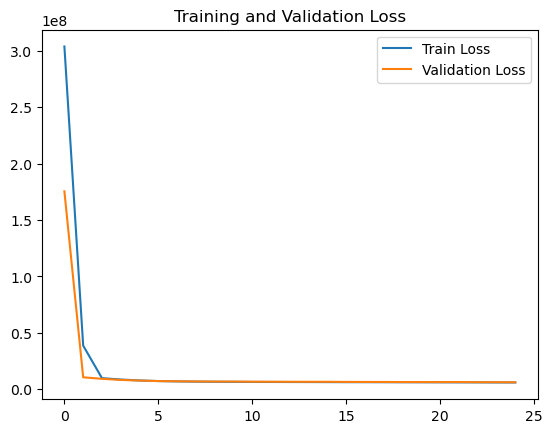

In [9]:
# Predicting on test data
y_pred_reg = model_reg.predict(X_test_reg_scaled)

# Plotting the loss curve
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [10]:
df

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation
...,...,...,...,...,...,...,...,...,...,...
8732,8732,2023-12-30 20:00:00,5,20,1,16.464144,0,7.909442,23111,Peak Load Shifting
8733,8733,2023-12-30 21:00:00,5,21,1,5.597822,0,3.319968,22308,Peak Load Shifting
8734,8734,2023-12-30 22:00:00,5,22,1,7.153052,0,9.686246,21935,Peak Load Shifting
8735,8735,2023-12-30 23:00:00,5,23,1,11.815588,0,0.498725,20497,Normal Operation


In [11]:
def assign_compensation_method(row):
    if row['is_holiday'] == 1:
        return 1
    elif row['solar_generation'] > 200:
        return 2
    elif row['hour_of_day'] >= 18 and row['hour_of_day'] <= 22:
        return 3
    elif row['temperature'] > 35:
        return 4
    else:
        return 5

df['compensation_method'] = df.apply(assign_compensation_method, axis=1)

print(df[['timestamp', 'load', 'compensation_method']].head(10))


            timestamp   load  compensation_method
0 2023-01-01 00:00:00  18493                    5
1 2023-01-01 01:00:00  17090                    5
2 2023-01-01 02:00:00  16052                    5
3 2023-01-01 03:00:00  15356                    5
4 2023-01-01 04:00:00  14936                    5
5 2023-01-01 05:00:00  14884                    5
6 2023-01-01 06:00:00  15314                    2
7 2023-01-01 07:00:00  16591                    2
8 2023-01-01 08:00:00  18271                    5
9 2023-01-01 09:00:00  19470                    2


Epoch 1/25


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7090 - loss: 0.8775 - val_accuracy: 0.9073 - val_loss: 0.2615
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9047 - loss: 0.2588 - val_accuracy: 0.9102 - val_loss: 0.2032
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9288 - loss: 0.1927 - val_accuracy: 0.9474 - val_loss: 0.1487
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9435 - loss: 0.1457 - val_accuracy: 0.9748 - val_loss: 0.1020
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9594 - loss: 0.1129 - val_accuracy: 0.9542 - val_loss: 0.0921
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.0886 - val_accuracy: 0.9708 - val_loss: 0.0773
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9794 - loss: 0.0688 - val_accuracy: 0.9811 - val_loss: 0.0579
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9750 - loss: 0.0665 - val_accuracy: 0.9897 - val_

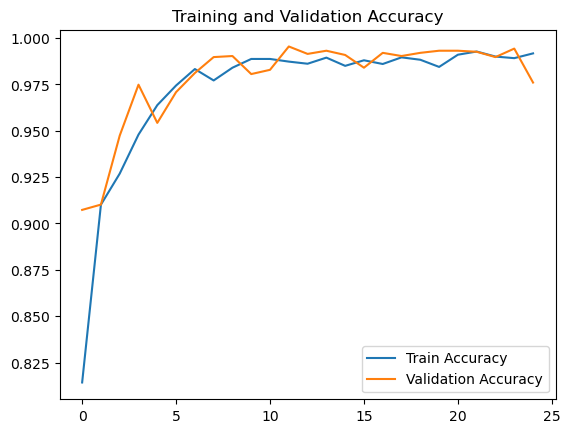

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# OneHotEncoder for the target labels
encoder = OneHotEncoder(sparse_output=False)

# One-hot encoding the target for multi-class classification
y_train_class_encoded = encoder.fit_transform(y_train_class.values.reshape(-1, 1))
y_test_class_encoded = encoder.transform(y_test_class.values.reshape(-1, 1))

# Scaling the data
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# ANN model for classification
model_class = Sequential()

# Adding layers
model_class.add(Dense(128, input_dim=X_train_class_scaled.shape[1], activation='relu'))
model_class.add(Dense(64, activation='relu'))
model_class.add(Dense(32, activation='relu'))
model_class.add(Dense(5, activation='softmax'))

# Compile the model
model_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_class = model_class.fit(X_train_class_scaled, y_train_class_encoded, epochs=25, batch_size=32, validation_data=(X_test_class_scaled, y_test_class_encoded))

# Predicting on test data
y_pred_class_prob = model_class.predict(X_test_class_scaled)
y_pred_class = np.argmax(y_pred_class_prob, axis=1)  # Converting softmax probabilities to class predictions

# Plotting the accuracy curve
plt.plot(history_class.history['accuracy'], label='Train Accuracy')
plt.plot(history_class.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [19]:
def predict_for_24_hours_ann(df_24hours, model_reg, model_class, scaler):
    # Preprocess the input for regression and classification
    X_24 = df_24hours[['temperature', 'solar_generation', 'hour_of_day', 'is_holiday']]
    X_24_scaled = scaler.transform(X_24)
    
    # Predict load using the regression model
    load_predictions = model_reg.predict(X_24_scaled)
    
    # Predict compensation method using the classification model
    class_predictions = model_class.predict(X_24_scaled)
    compensation_methods = np.argmax(class_predictions, axis=1)  # Get class labels
    
    df_24hours['predicted_load'] = load_predictions
    df_24hours['predicted_compensation_method'] = compensation_methods
    
    return df_24hours

# Use the combined prediction function on a 24-hour dataset (example)
df_24hours = pd.DataFrame({
    'temperature': np.random.uniform(15, 45, 24),
    'solar_generation': np.random.uniform(0, 5000, 24),
    'hour_of_day': np.arange(24),
    'is_holiday': np.random.randint(0, 2, 24)
})

predictions_24_hours = predict_for_24_hours_ann(df_24hours, model_reg, model_class, scaler)
print(predictions_24_hours)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
    temperature  solar_generation  hour_of_day  is_holiday  predicted_load  \
0     42.467325       2355.821324            0           0    57852.914062   
1     39.329344       1192.930426            1           0    30382.607422   
2     23.034300        896.728373            2           1    21096.583984   
3     20.313283       3026.589882            3           0    78311.664062   
4     23.765476       2945.828338            4           0    76471.929688   
5     31.743729        323.682488            5           1    17841.951172   
6     36.138625       1666.609731            6           1    26155.580078   
7     26.721322       4308.863544            7           1    67273.617188   
8     31.319309       1598.096853            8           0    44867.800781   
9     17.397421       2927.348750            9           1    44113.828125   
10    15.965888        976.689705           10           1    2410

In [20]:
import seaborn as sns

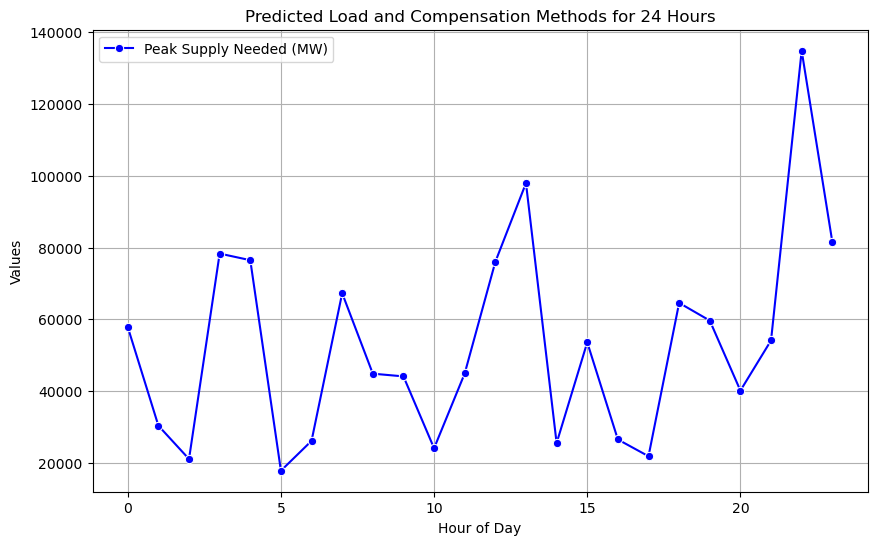

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=predictions_24_hours, x='hour_of_day', y='predicted_load',  marker='o', color='blue', label='Peak Supply Needed (MW)')
# sns.lineplot(data=df, x='hour_of_day', y='load', palette='Set1')
plt.title('Predicted Load and Compensation Methods for 24 Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

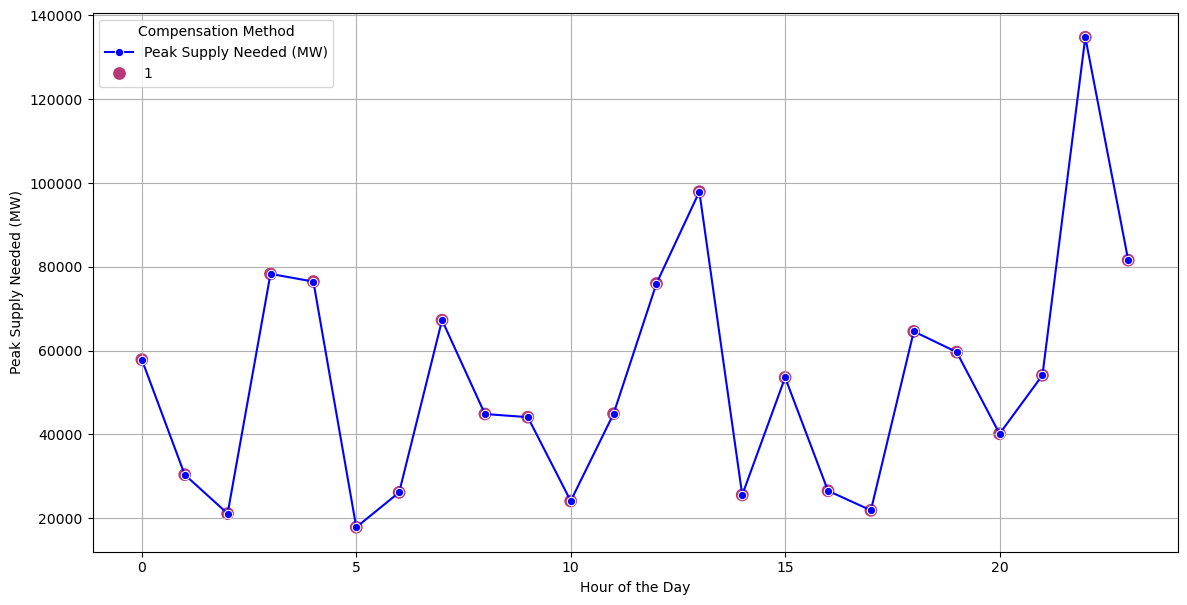

In [22]:
def plot_predictions(df_predictions):
    plt.figure(figsize=(14, 7))

    sns.lineplot(data=predictions_24_hours, x='hour_of_day', y='predicted_load', marker='o', color='blue', label='Peak Supply Needed (MW)')
    
    sns.scatterplot(data=predictions_24_hours, x='hour_of_day', y='predicted_load', hue='predicted_compensation_method', palette='magma', s=100, legend='full', marker='o')

    # plt.title('Hourly Predictions for {}'.format(df_predictions['date'][0]))
    plt.xlabel('Hour of the Day')
    plt.ylabel('Peak Supply Needed (MW)')
    plt.legend(title='Compensation Method')
    plt.grid(True)
    plt.show()

plot_predictions(predictions_24_hours)

### 

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

ValueError: Found input variables with inconsistent numbers of samples: [8737, 1748]